Que. 2

Perform K-Means,Hierarchical and DBSCAN Clustering for the crime_data.csv data and identify the number of clusters formed and Visualise the results.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [39]:
import warnings 
warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("crime_data.csv")

In [42]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [43]:
df.drop(df.columns[0],axis = 1,inplace = True)

In [44]:
from sklearn.cluster import AgglomerativeClustering
k = 3
cluster_info = AgglomerativeClustering(n_clusters=k)
cluster_info = cluster_info.fit(df)

In [45]:
cluster_info.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [46]:
cluster_info.n_clusters_

3

### Visualization

Text(0.5, 1.0, 'Hierarchical clustering')

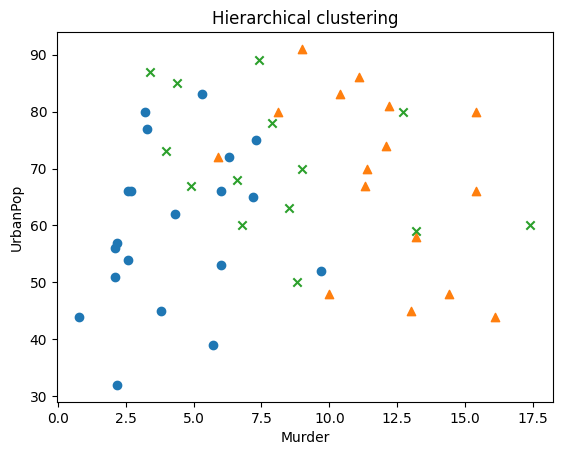

In [50]:
markers = ['o','^','x']
for cluster in range(k):
    plt.scatter(
        df['Murder'][cluster == cluster_info.labels_],
        df['UrbanPop'][cluster == cluster_info.labels_],
        marker = markers[cluster]
    )
plt.xlabel('Murder')
plt.ylabel('UrbanPop')
plt.title('Hierarchical clustering')

# DBSCAN

In [58]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=7,min_samples=10)
dbscan = dbscan.fit(df)

In [61]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Visualize the clusters

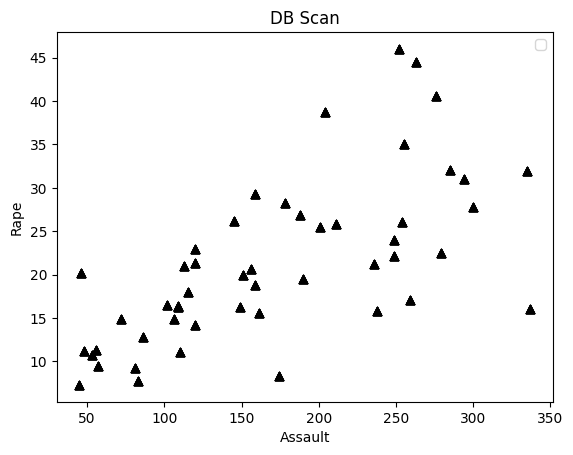

In [66]:
markers = ['o','^','*','s','x']
for cluster in range(5):
    plt.scatter(
        df['Assault'][dbscan.labels_ == cluster],
        df['Rape'][dbscan.labels_ == cluster],
        marker = markers[cluster]
    )

    plt.scatter(
        df['Assault'][dbscan.labels_ == -1],
        df['Rape'][dbscan.labels_ == -1],
        marker = '^',
        color = "black"
    )
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.title('DB Scan')
plt.legend()